Creates temperature graphs for the UV-C spot.

## How to get the graph

For input data the CSV file format is execpted containing data like ...

```
timestamp;temperature;humidity
2024-06-25T09:46:08,331868023+01:00;26.9;50.9
2024-06-25T09:46:09,381622065+01:00;26.9;50.9
2024-06-25T09:46:10,425298595+01:00;26.9;50.9
2024-06-25T09:46:11,471144083+01:00;26.9;50.8
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [2]:
uvcSpot_100mA_inputFile = '100mA.csv'
uvcSpot_200mA_inputFile = '200mA.csv'
uvcSpot_300mA_inputFile = '300mA.csv'
uvcSpot_400mA_inputFile = '400mA.csv'
uvcSpot_500mA_inputFile = '500mA.csv'

def download(filename):
  response = requests.get('https://raw.githubusercontent.com/tederer/octowatch-evaluation/main/measurements/uvc-spot_temperature/' + filename)
  with open(filename, 'wb') as fd:
      for chunk in response.iter_content(chunk_size=128):
          fd.write(chunk)

download(uvcSpot_100mA_inputFile)
download(uvcSpot_200mA_inputFile)
download(uvcSpot_300mA_inputFile)
download(uvcSpot_400mA_inputFile)
download(uvcSpot_500mA_inputFile)

In [3]:
csvFiles = {
  '100mA': pd.read_csv(uvcSpot_100mA_inputFile, sep=';'),
  '200mA': pd.read_csv(uvcSpot_200mA_inputFile, sep=';'),
  '300mA': pd.read_csv(uvcSpot_300mA_inputFile, sep=';'),
  '400mA': pd.read_csv(uvcSpot_400mA_inputFile, sep=';'),
  '500mA': pd.read_csv(uvcSpot_500mA_inputFile, sep=';')
}

In [4]:
lineCount = 0

for key in ['100mA', '200mA', '300mA']:
    if lineCount == 0:
      lineCount = csvFiles[key].shape[0];
    else:
      lineCount = min(lineCount, csvFiles[key].shape[0])

firstLine                 = True
firstTimestampInSec       = 0
durationSinceStartInHours = []


for index in range(0, lineCount):
  durationSinceStartInHours.append(index / 3600)

temperature_100mA = []
temperature_200mA = []
temperature_300mA = []

for index in range(0, lineCount):
  temperature_100mA_Row = csvFiles['100mA'].iloc[index]
  temperature_200mA_Row = csvFiles['200mA'].iloc[index]
  temperature_300mA_Row = csvFiles['300mA'].iloc[index]
  temperature_100mA.append(float(temperature_100mA_Row['temperature']))
  temperature_200mA.append(float(temperature_200mA_Row['temperature']))
  temperature_300mA.append(float(temperature_300mA_Row['temperature']))

temperature_400mA = []

for index in range(0, csvFiles['400mA'].shape[0]):
  temperature_400mA_Row = csvFiles['400mA'].iloc[index]
  temperature_400mA.append(float(temperature_400mA_Row['temperature']))
  if index >= 494:    #limit line to maximum of 53,2 °C for 400 mA according to datasheet of LED
    break
temperature_500mA = []

for index in range(0, csvFiles['500mA'].shape[0]):
  temperature_500mA_Row = csvFiles['500mA'].iloc[index]
  temperature_500mA.append(float(temperature_500mA_Row['temperature']))
  if index >= 184:    #limit line to maximum of 39,0 °C for 500 mA according to datasheet of LED
    break

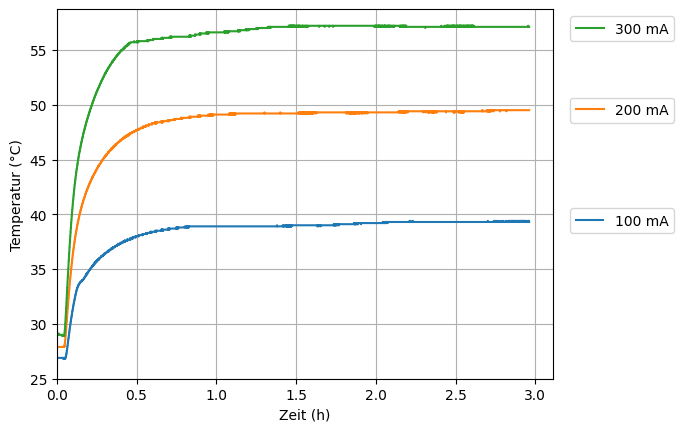

In [5]:
figure, fpsPerFrameAxis = plt.subplots()

temperature_100mA_Line, = fpsPerFrameAxis.plot(durationSinceStartInHours, temperature_100mA, label = '100 mA')
temperature_200mA_Line, = fpsPerFrameAxis.plot(durationSinceStartInHours, temperature_200mA, label = '200 mA')
temperature_300mA_Line, = fpsPerFrameAxis.plot(durationSinceStartInHours, temperature_300mA, label = '300 mA')

fpsPerFrameAxis.set_xlabel('Zeit (h)')
fpsPerFrameAxis.set_ylabel('Temperatur (°C)')
fpsPerFrameAxis.set_xlim(0)
fpsPerFrameAxis.set_ylim(25)
fpsPerFrameAxis.grid(True)

legend = figure.legend(handles = [temperature_100mA_Line], bbox_to_anchor=(1.1, 0.48))
legend = figure.legend(handles = [temperature_200mA_Line], bbox_to_anchor=(1.1, 0.71))
legend = figure.legend(handles = [temperature_300mA_Line], bbox_to_anchor=(1.1, 0.88))

figure.savefig('uvc-spot_temperature_100to300mA.png', bbox_extra_artists=(legend,), bbox_inches='tight', dpi=300)

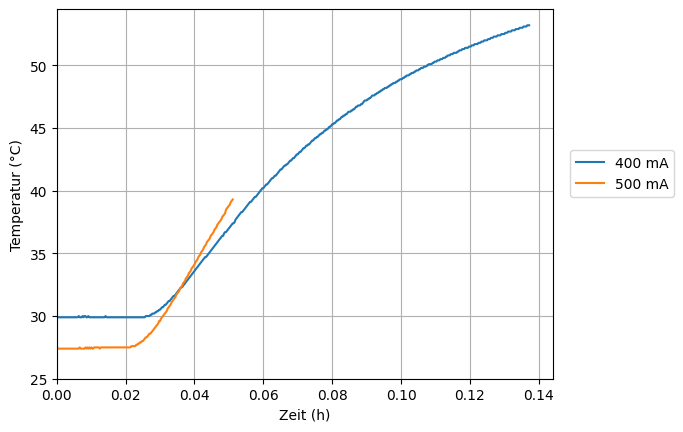

In [6]:
figure2, fpsPerFrameAxis2 = plt.subplots()

temperature_400mA_Line, = fpsPerFrameAxis2.plot(durationSinceStartInHours[0:len(temperature_400mA)], temperature_400mA, label = '400 mA')
temperature_500mA_Line, = fpsPerFrameAxis2.plot(durationSinceStartInHours[0:len(temperature_500mA)], temperature_500mA, label = '500 mA')

fpsPerFrameAxis2.set_xlabel('Zeit (h)')
fpsPerFrameAxis2.set_ylabel('Temperatur (°C)')
fpsPerFrameAxis2.set_xlim(0)
fpsPerFrameAxis2.set_ylim(25)
fpsPerFrameAxis2.grid(True)

legend2 = figure2.legend(handles = [temperature_400mA_Line, temperature_500mA_Line], bbox_to_anchor=(1.1, 0.6))

figure2.savefig('uvc-spot_temperature_400to500mA.png', bbox_extra_artists=(legend2,), bbox_inches='tight', dpi=300)